In [22]:
%matplotlib inline 
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

np.random.seed(0)

In [2]:
# read data into program

training_dataset = np.load('train.npy')
test_dataset = np.load('test.npy')

In [17]:
# get training data
X_train = training_dataset[()]['train_x']
Y_train = training_dataset[()]['train_labels']

N,D = X_train.shape

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

X_train shape:  (20000, 8192)
Y_train shape:  (20000,)


In [18]:
# get test data
X_test = test_dataset[()]['test_x']
Y_test = test_dataset[()]['test_labels']

N_test,D_test = X_test.shape

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_test shape:  (1200, 8192)
Y_test shape:  (1200,)


In [93]:
# sample from training data

# choose how many samples to sample
n_sample_train = 0.2
# get index
idx_train = np.random.choice(N, int(n_sample_train*N), replace=False)

# map index to rows
x_train = X_train[idx_train,:]
y_train = Y_train[idx_train]

# deal with labels to -1 and 1
y_train[ y_train <0.5 ] = -1

n,d = x_train.shape

print("choose {} samples from the training set".format(int(n_sample_train*N)))
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print(n,d)

choose 4000 samples from the training set
x_train shape:  (4000, 8192)
y_train shape:  (4000,)
4000 8192


In [65]:
# sample from test data

# choose how many samples to sample
n_sample_test = 1
# get index
idx_test = np.random.choice(N_test, int(n_sample_test*N_test), replace=False)

# map index to rows
x_test = X_test[idx_test,:]
y_test = Y_test[idx_test]

y_test[ y_test<0.5 ] = -1

n_test, d_test = x_test.shape

print("choose {} samples from the test set".format(int(n_sample_test*N_test)))
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)
print(n_test, d_test)

choose 1200 samples from the test set
x_test:  (1200, 8192)
y_test:  (1200,)
1200 8192


# toy training dataset
dataset = [
    [1,2,3,4,5],
    [1,3,4,5,6],
    [1,3,4,5,3],
    [1,1,2,3,3],
    [0,1,5,4,5],
    [0,3,5,1,3],
    [0,2,3,5,1]
]

data = np.array(dataset)

# split toy training data into samples and labels

x_train = data[:,1:]
y_train = data[:,0]

# get the size of the data
N,D = x_train.shape

print("Data has {} samples and {} features".format(N, D))
print("training data size:", x_train.shape)
print("training label:", y_train.shape)

# test data
dataset_test = [
    [1,4,5,63,5],
    [1,7,22,1,4],
    [0,3,4,1,5],
    [0,66,3,2,1]
]

data_test = np.array(dataset_test)

# split test data into samples and labels

x_test = data_test[:,1:]
y_test = data_test[:,0]

# get the size of the data
N_test,D_test = x_test.shape

print("Data has {} samples and {} features".format(N_test, D_test))
print("test data size:", x_test.shape)
print("test label:", y_test.shape)

In [94]:
# Initialize Weight
w_mu = np.zeros(d)
w_sigma = np.eye(d)

#Intialize noise
sigma_square = 0.1**2

print("w_mu size:   ", w_mu.shape)
print("w_sigma size:", w_sigma.shape)

w_mu size:    (8192,)
w_sigma size: (8192, 8192)


In [95]:
# posterior
w_mu_posterior = w_mu + \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @ \
                    (y_train - x_train@w_mu)
w_sigma_posterior = w_sigma - \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @x_train@w_sigma
    
print("w_mu_posterior: ", w_mu_posterior)
print("w_sigma_posterior: ", w_sigma_posterior)

w_mu_posterior:  [-0.02289741 -0.96913191 -5.43937517 ..., -2.79184591 -5.59072107
  3.10900686]
w_sigma_posterior:  [[  9.99064710e-01  -2.58150003e-04   2.06377928e-04 ...,   1.09940381e-04
    4.72501324e-04   1.55509846e-04]
 [ -2.58150003e-04   9.60844120e-01   9.10260293e-03 ...,   4.51232291e-03
    3.41459814e-03   3.09965906e-03]
 [  2.06377928e-04   9.10260293e-03   5.68895143e-01 ...,  -3.30922907e-03
    8.02347366e-04   5.11615067e-03]
 ..., 
 [  1.09940381e-04   4.51232291e-03  -3.30922907e-03 ...,   9.08416122e-01
   -2.35014398e-03   6.96220569e-03]
 [  4.72501324e-04   3.41459814e-03   8.02347366e-04 ...,  -2.35014398e-03
    1.94692703e-01  -5.60217605e-02]
 [  1.55509846e-04   3.09965906e-03   5.11615067e-03 ...,   6.96220569e-03
   -5.60217605e-02   1.34066005e-01]]


In [99]:
# prediction
y_star_mu_posterior = x_test@w_mu_posterior
y_star_sigma_posterior = x_test@w_sigma_posterior@x_test.T + \
                            sigma_square*np.eye(n_test)

var = np.sqrt(y_star_sigma_posterior.diagonal())

print("y_star_mu_posterior: ", y_star_mu_posterior)
print("y_star_sigma_posterior: ", y_star_sigma_posterior)
print("var: ", var)

y_star_mu_posterior:  [ 0.23734223  2.1349341   0.90198517 ...,  0.24787628  0.76167389
 -0.67843944]
y_star_sigma_posterior:  [[  4.89688684e-02  -9.81767393e-04  -1.38524168e-03 ...,   3.53249954e-05
   -3.31431345e-04   1.22145376e-03]
 [ -9.81767382e-04   6.69738413e-02   8.74308725e-04 ...,   1.51620115e-03
    1.35595820e-03  -1.14273732e-03]
 [ -1.38524168e-03   8.74308714e-04   1.98780468e-01 ...,   1.54458849e-03
    2.47033605e-03   1.05513430e-03]
 ..., 
 [  3.53248700e-05   1.51620103e-03   1.54458837e-03 ...,   5.56676378e-02
   -4.70725726e-04   7.05495363e-05]
 [ -3.31431415e-04   1.35595813e-03   2.47033598e-03 ...,  -4.70725674e-04
    5.68029381e-02  -1.05741396e-03]
 [  1.22145376e-03  -1.14273734e-03   1.05513429e-03 ...,   7.05496434e-05
   -1.05741390e-03   2.89229433e-02]]
var:  [ 0.22128911  0.25879305  0.44584803 ...,  0.2359399   0.23833367
  0.17006747]


In [100]:
# fixed threshold

# get the prediction
threshold = 0

predictions = y_star_mu_posterior.copy()
predictions[ predictions<threshold ] = -1
predictions[ predictions>=threshold ] = 1

# compare predictions to true label
n_correct = sum(predictions == y_test)

print("accuaracy = ", n_correct/n_test)

accuaracy =  0.524166666667


In [108]:
# find best threshold
max_correct, best_threshold = 0, 0
record_correct = []
for threshold in np.arange(-2,2,0.1):
    predictions = y_star_mu_posterior.copy()
    predictions[ predictions<threshold ] = -1
    predictions[ predictions>=threshold ] = 1
    n_correct = sum(predictions == y_test)
    record_correct.append( n_correct )
    if n_correct > max_correct:
        max_correct = n_correct
        best_threshold = threshold
    
record_correct = np.array( record_correct )
print( "best accuracy is : ", max_correct/n_test )
print( "best threshold is: ", best_threshold )

best accuracy is :  0.534166666667
best threshold is:  0.2


[604 604 604 604 604 604 604 604 604 604 590 592 587 598 601 616 607 618
 624 625 629 630 641 639 635 635 638 637 635 630 629 620 618 620 624 630
 628 629 625 625]


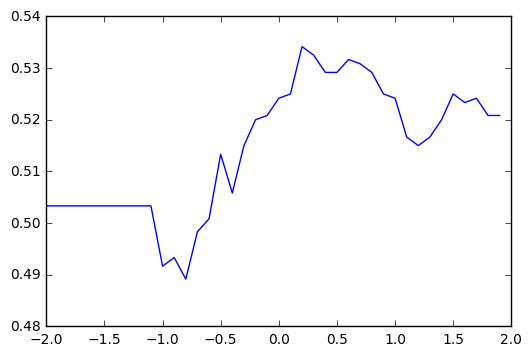

In [103]:
# plot record of correctness w.r.t threshold
print(record_correct)
# print(record_correct)
plt.plot(np.arange(-2,2,0.1), record_correct/n_test)

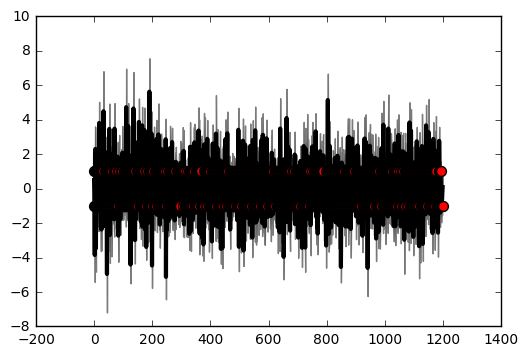

In [92]:
# plot
x_index = [i for i in range(n_test)]
plt.scatter(x_index, y_test, c='r', s=50, zorder=10)
plt.plot(x_index, y_star_mu_posterior,'k', lw=3, zorder=9)
plt.fill_between(x_index, y_star_mu_posterior - 2*var, y_star_mu_posterior + 2*var, alpha=0.5, color='k')